# <center>Data Science Project</center>


## Title
Business Intelligence For Cloud Kitchens Based On Food Delivery App Data 

## Team 

Ajay VH, Pranav Banagar, Aviral Mishra, Ishita Jain, Amit Bharadwaj

## Description

Resturant and food delivery business is highly competitive and profit margins are often tight. Data driven service can help reduce costs and wastage of food while also helping businesses increase profits. Food delivery apps are an excellent source of vast amounts of data that can be mined for valuable information for important business decisions. Swiggy and Zomato combined make up 80% the food delivery market space in major metro cities in India. Data aggregated from these two companies can reliably represent the oevrall trends in the market. This exploratory data analysis aims to paint a picture on the overall market landscape to help an entity that is about to enter the market. Required data is obtained from Kaggle datasets. 

## Datasets

Swiggy : https://www.kaggle.com/datasets/aniruddhapa/swiggy-restaurants-dataset-of-metro-cities

Zomato : https://www.kaggle.com/datasets/pranavuikey/zomato-eda

## Objectives

Swiggy and Zomato data sets are used to extract market insights through an exploratory data analysis. The goal is to find actionable insights to aid in the formulation of a business plan for a new food delivery business. 

## Importing Libraries 

In [27]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Loading dataframes

In [19]:
swiggy_df = pd.read_csv('Swiggy.csv')

In [20]:
swiggy_df.describe()
print(swiggy_df.shape)
print(swiggy_df.columns)
print(swiggy_df.index)
swiggy_df.info()

(8691, 18)
Index(['type', 'id', 'name', 'uuid', 'city', 'area', 'avgRating',
       'totalRatingsString', 'cuisines', 'costForTwoStrings', 'deliveryTime',
       'minDeliveryTime', 'maxDeliveryTime', 'address', 'locality',
       'unserviceable', 'veg', 'City'],
      dtype='object')
RangeIndex(start=0, stop=8691, step=1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8691 entries, 0 to 8690
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type                8691 non-null   object 
 1   id                  8691 non-null   int64  
 2   name                8691 non-null   object 
 3   uuid                8688 non-null   object 
 4   city                8691 non-null   object 
 5   area                8691 non-null   object 
 6   avgRating           8691 non-null   object 
 7   totalRatingsString  8691 non-null   object 
 8   cuisines            8691 non-null   object 
 9   costForTwoStrings   8691 

In [11]:
zomato_df = pd.read_csv('zomato.csv')

In [12]:
zomato_df.describe()
zomato_df.describe()
print(zomato_df.shape)
print(zomato_df.columns)
print(zomato_df.index)
zomato_df.info()

(51717, 17)
Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')
RangeIndex(start=0, stop=51717, step=1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-

## Data Preprocessing 

## Swiggy

In [21]:
swiggy_df.head()

,type,id,name,uuid,city,area,avgRating,totalRatingsString,cuisines,costForTwoStrings,deliveryTime,minDeliveryTime,maxDeliveryTime,address,locality,unserviceable,veg,City
0,F,37933,Faasos - Wraps & Rolls,6fe9caf1-02a7-4e66-83bb-1b4ff296b683,Ahmedabad,Vastrapur,4.2,500+ ratings,['Combo' 'Snacks' 'Beverages' 'Desserts' 'Indi...,₹200 FOR TWO,44,44,44,SHOP NO 2 HOTEL SHAHI PALACE VASTRAPUR LAKE AH...,HOTEL SHAHI PALACE,False,False,NaN
1,F,81814,Burger King,10083576-d32d-4a0e-8a82-3236ef342a19,Ahmedabad,Ellisbridge,4.2,1000+ ratings,['American' 'Fast Food'],₹350 FOR TWO,33,33,33,SHOP # 5 GR FLR THIRD EYE 2PANCHAVATI CIRCLE O...,3rd Eye II Ellis Bridge CG Road,False,False,NaN
2,F,107046,Mahalaxmi Pav Bhaji,fbfe3bfa-03fd-4708-b913-06e2c9ee9639,Ahmedabad,Ellisbridge,4.3,500+ ratings,['North Indian'],₹200 FOR TWO,28,28,28,GF 9/10 Dev complexnear parimal charasta opp. ...,C G Road,False,True,NaN
3,F,328315,HIIT Meals,81ab4019-2445-4aef-aff2-04beccd641d9,Ahmedabad,Vishala,--,Too Few Ratings,['Fast Food' 'Combo' 'Snacks' 'North Indian' '...,₹150 FOR TWO,51,51,51,C11 Rajyash Rise Near Vishala Restaurant Vasna...,Vasna,False,False,NaN
4,F,108879,Jay Jalaram Parotha House,994e73e1-7c7c-4ad9-87e7-ecfecd4e36fa,Ahmedabad,Ellisbridge,3.9,100+ ratings,['North Indian'],₹250 FOR TWO,29,29,29,Capital Commercial Centre Near UCO Bank Ashram...,Ashram Road,False,True,NaN


In [15]:
swiggy_df.isnull().sum()

type                     0
id                       0
name                     0
uuid                     3
city                     0
area                     0
avgRating                0
totalRatingsString       0
cuisines                 0
costForTwoStrings        0
deliveryTime             0
minDeliveryTime          0
maxDeliveryTime          0
address                  9
locality                10
unserviceable            6
veg                      6
City                  8691
dtype: int64

In [24]:
swiggy_df.drop(['type','uuid','City', 'totalRatingsString','costForTwoStrings', 'address', 'locality', 'minDeliveryTime', 'maxDeliveryTime', 'unserviceable'],axis=1,inplace=True)
swiggy_df.head(3)

,id,name,city,area,avgRating,cuisines,deliveryTime,veg
0,37933,Faasos - Wraps & Rolls,Ahmedabad,Vastrapur,4.2,['Combo' 'Snacks' 'Beverages' 'Desserts' 'Indi...,44,False
1,81814,Burger King,Ahmedabad,Ellisbridge,4.2,['American' 'Fast Food'],33,False
2,107046,Mahalaxmi Pav Bhaji,Ahmedabad,Ellisbridge,4.3,['North Indian'],28,True


In [28]:
def clean(x):
    #to remove html tag
    x = re.sub(r'<.*?>',' ',x)
    x= re.sub(r"can't",'can not',x)
    x= re.sub(r"don't",'do not',x)
    x= re.sub(r"didn't",'did not',x)
    #change to mobile number
    x= re.sub(r'[\d-]{10,12}','mobno',x)
    #to remove punctuatin and numbers
    x = re.sub(r'[^A-Za-z]',' ',x)
    #to replace more than 1 space with 1 space
    x = re.sub(r'\s+',' ',x)
    #to convert into lower
    return x
swiggy_df['cuisines'] = swiggy_df.cuisines.apply(clean)

In [30]:
swiggy_df.rename(columns={'id':'Resturant_Id','name':'Restaurants','city':'City','area':'Locality', 'avgRating':'Ratings', 'cuisines':'Cuisines', 'deliveryTime':'Delivery Time', 'veg':'Pure Veg'},inplace=True)
swiggy_df.head(3)

,Resturant_Id,Restaurants,City,Locality,Ratings,Cuisines,Delivery Time,Pure Veg
0,37933,Faasos - Wraps & Rolls,Ahmedabad,Vastrapur,4.2,Combo Snacks Beverages Desserts Indian,44,False
1,81814,Burger King,Ahmedabad,Ellisbridge,4.2,American Fast Food,33,False
2,107046,Mahalaxmi Pav Bhaji,Ahmedabad,Ellisbridge,4.3,North Indian,28,True


In [34]:
swiggy_df.dropna(inplace=True)
len(swiggy_df)

8685

In [37]:
swiggy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8685 entries, 0 to 8690
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Resturant_Id   8685 non-null   int64 
 1   Restaurants    8685 non-null   object
 2   City           8685 non-null   object
 3   Locality       8685 non-null   object
 4   Ratings        8685 non-null   object
 5   Cuisines       8685 non-null   object
 6   Delivery Time  8685 non-null   int64 
 7   Pure Veg       8685 non-null   object
dtypes: int64(2), object(6)
memory usage: 610.7+ KB


In [41]:
swiggy_df[swiggy_df.duplicated()].count().sum()

0

In [63]:
swiggy_df['Ratings'].unique()

array(['4.2', '4.3', '--', '3.9', '4.1', '4.4', '3.7', '4', '4.5', '3.8',
       '3', '4.6', '2.8', '3.3', '4.8', '3.5', '2.9', '2.4', '2.6', '3.2',
       '3.6', '4.7', '3.4', '2.7', '3.1', '4.9', '5', '2.5', '2.2', '2.3',
       '2'], dtype=object)

In [64]:
swiggy_df['Ratings'].isnull().sum()

0

In [65]:
swiggy_df['City'].unique()

array(['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Kolkata', 'Mumbai', 'Pune', 'Surat'], dtype=object)

In [67]:
swiggy_df['Locality'].unique()

array(['Vastrapur', 'Ellisbridge', 'Vishala', 'Paldi', 'Drive In Road',
       'Navrangpura', 'Gulbai Tekra', 'Paldi & Ambawadi', 'Jodhpur Tekra',
       'Lal Darwaja', 'Ambawadi', 'Khamasa', 'Khadia', 'Ahmedabad',
       'LalDarwaja', 'Bhadra', 'University Area', 'Raikhad', 'Khanpur',
       'CG Road', 'Shahpur', 'Ambavadi', 'Navjivan', 'Naranpura',
       'Ramdev Nagar', 'Bodakdev', 'Satellite', 'Prahlad Nagar',
       'Chanakyapuri', 'Odhav', 'Thaltej', 'Sindhu Bhavan Road',
       'Maninagar', 'Usmanpura', 'Panjarapole Cross Road', 'Nehrunagar',
       'Madhupura', 'Kalupur', 'Sherkotda', 'Narayan Nagar',
       'Jivraj Park', 'Kankaria', 'Danilimda', 'Prahlad nagar',
       'Sardar Colony', 'Jodhpur Village', 'Girdhar Nagar', 'Gomtipur',
       'Juhapura', 'Memnagar', 'Shyamal', 'Vasna', 'Shah-E-Alam Roja',
       'Dudheshwar', 'Gurukul', 'Old Wadaj', 'Ghatlodia',
       ' Akhbar Nagar Circle', 'Jodhpur Cross Road', 'SARKHEJ ROAD',
       'Nava Vadaj', 'Ranip', 'Khokhra', 'Isanpur

In [68]:
swiggy_df['Locality'].isnull().sum()

0

In [69]:
a=swiggy_df['Locality'].value_counts(ascending=False)
a

Rohini                             253
Chembur                            207
Kothrud                            146
Andheri East                       135
Navrangpura                        133
                                  ... 
Hyderguda Old MLA home               1
Bhavani Nagar Uppal - Hyderabad      1
asif nagar                           1
Yakhutpura                           1
varachha                             1
Name: Locality, Length: 878, dtype: int64

In [70]:
swiggy_df.isnull().sum()

Resturant_Id     0
Restaurants      0
City             0
Locality         0
Ratings          0
Cuisines         0
Delivery Time    0
Pure Veg         0
dtype: int64

,Cuisines
Indian,389
Chinese,277
North Indian,246
Fast Food,241
South Indian,228
Indian Chinese,121
Desserts,106
North Indian Chinese,105
Bakery,90
Beverages,82


Text(0.5, 1.0, 'Popular cuisines in India')

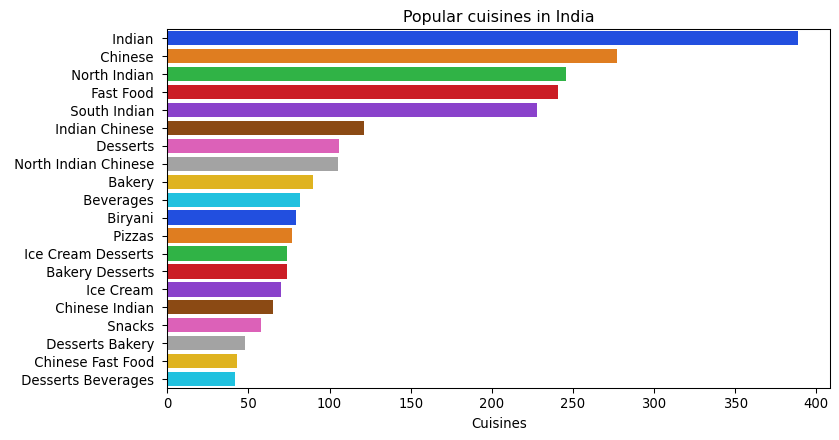

In [76]:
cuisines=swiggy_df['Cuisines'].value_counts().head(20)
display(cuisines.to_frame())
plt.figure(figsize=(9,5),dpi=95)
sns.barplot(x=cuisines,y= cuisines.index ,palette='bright')
plt.title('Popular cuisines in India')

In [101]:
def clean_ratings(x):
    x = re.sub(r'--','00',x)
    return x
swiggy_df['Ratings'] = swiggy_df.Ratings.apply(clean_ratings)

In [103]:
swiggy_df = swiggy_df.convert_dtypes()
swiggy_df['Ratings'] = swiggy_df['Ratings'].apply(pd.to_numeric)
swiggy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8685 entries, 0 to 8690
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Resturant_Id   8685 non-null   Int64  
 1   Restaurants    8685 non-null   string 
 2   City           8685 non-null   string 
 3   Locality       8685 non-null   string 
 4   Ratings        8685 non-null   float64
 5   Cuisines       8685 non-null   string 
 6   Delivery Time  8685 non-null   Int64  
 7   Pure Veg       8685 non-null   boolean
dtypes: Int64(2), boolean(1), float64(1), string(4)
memory usage: 576.7 KB


,Ratings
Locality,
Chembur,538.2
Rohini,442.8
Bidhannagar,420.8
Andheri East,394.3
Koramangala,383.5


AxesSubplot(0.125,0.125;0.775x0.755)


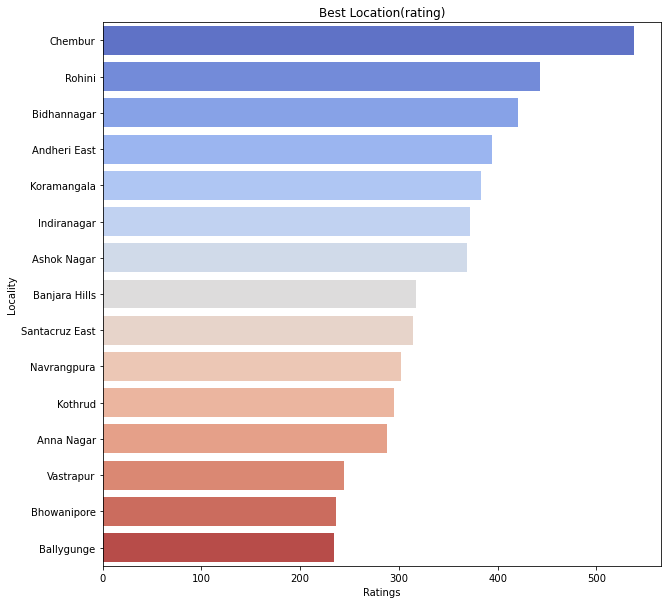

In [104]:
loc_rate=swiggy_df.loc[:,['Locality','Ratings']]
loc_rate=swiggy_df.groupby('Locality')['Ratings'].sum()
loc_rate=loc_rate.to_frame()
loc_rate=loc_rate.sort_values("Ratings",ascending=False)
display(loc_rate.head())
plt.figure(figsize=(10,10))
pt=sns.barplot(y=loc_rate.index[:15],x=loc_rate['Ratings'][:15],palette='coolwarm',orient='h')
plt.title('Best Location(rating)')
print(pt)

## Zomato

In [20]:
zomato_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [16]:
zomato_df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [15]:
zomato_df.drop(['url','address','phone','menu_item','dish_liked','reviews_list','listed_in(city)'],axis=1,inplace=True)
zomato_df.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet


In [17]:
zomato_df.rename(columns={'name':'restaurants','book_table':'booking','listed_in(city)':'city','rate':'rating','approx_cost(for two people)':'cost','listed_in(type)':'types'},inplace=True)
zomato_df.head(3)

,restaurants,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet


In [31]:
len(zomato_df)

51717

In [36]:
zomato_df.dropna(inplace=True)
len(zomato_df)

43533

In [38]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43533 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   restaurants   43533 non-null  object
 1   online_order  43533 non-null  object
 2   booking       43533 non-null  object
 3   rating        43533 non-null  object
 4   votes         43533 non-null  int64 
 5   location      43533 non-null  object
 6   rest_type     43533 non-null  object
 7   cuisines      43533 non-null  object
 8   cost          43533 non-null  object
 9   types         43533 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


In [39]:
zomato_df[zomato_df.duplicated()].count().sum()

125750

In [42]:
zomato_df.drop_duplicates(inplace=True)

In [44]:
zomato_df.shape

(30958, 10)

In [46]:
zomato_df[zomato_df.duplicated()].count().sum()

0

In [47]:
zomato_df['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [49]:
def rate(value):
    if value=='NEW' or value=='-':
        return int(0)
    else:
        value=value.split('/')
        value=value[0]
        return float(value)
    
zomato_df['rating']=zomato_df['rating'].apply(rate)
zomato_df['rating'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rating, dtype: float64

In [50]:
zomato_df['rating'].isnull().sum()

0

In [52]:
zomato_df['rating'].fillna(zomato_df['rating'].mean(),inplace=True)
zomato_df['rating'].isnull().sum()

0

In [53]:
zomato_df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [54]:
zomato_df['location'].isnull().sum()

0

In [55]:
a=zomato_df['location'].value_counts(ascending=False)
a

BTM                      2228
Indiranagar              1653
Whitefield               1630
Koramangala 5th Block    1577
HSR                      1558
                         ... 
Central Bangalore           5
Yelahanka                   4
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

In [56]:
zomato_df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [58]:
def money(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return int(value)
    else:
        return int(value)

zomato_df['cost']=zomato_df['cost'].apply(money)

In [60]:
zomato_df.cost.unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130, 1700, 1400, 1350, 2200,
       2000, 1800, 1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,
         40, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,  560,  240,
        360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 1650, 2700, 4500],
      dtype=int64)

In [61]:
zomato_df['cost'].isnull().sum()

0

,rest_type
Quick Bites,10143
Casual Dining,7311
Cafe,2495
Dessert Parlor,1357
Delivery,1117
"Takeaway, Delivery",965
"Casual Dining, Bar",940
Bakery,547
Bar,456
Beverage Shop,417


Text(0.5, 1.0, 'Restaurant types in Bangalore')

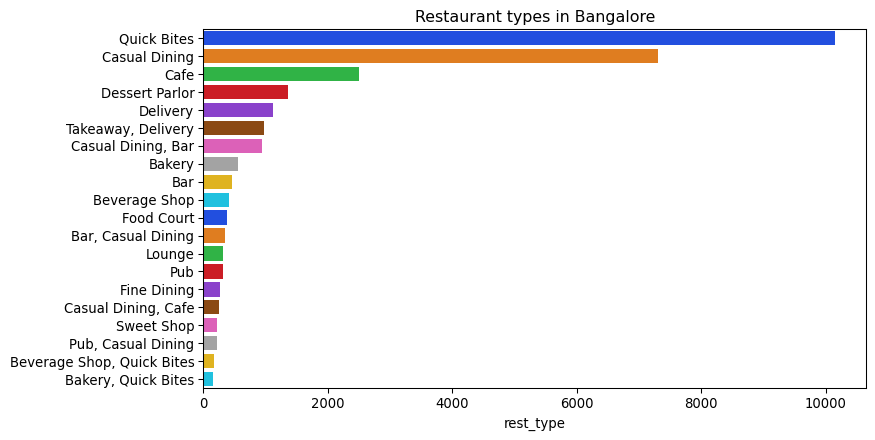

In [75]:
type1=zomato_df['rest_type'].value_counts().head(20)
display(type1.to_frame())
plt.figure(figsize=(9,5),dpi=95)
sns.barplot(x=type1,y= type1.index ,palette='bright')
plt.title('Restaurant types in Bangalore')

,votes
location,
Koramangala 5th Block,1984132
Indiranagar,1129994
Koramangala 4th Block,591240
Church Street,555228
JP Nagar,479180


AxesSubplot(0.125,0.125;0.775x0.755)


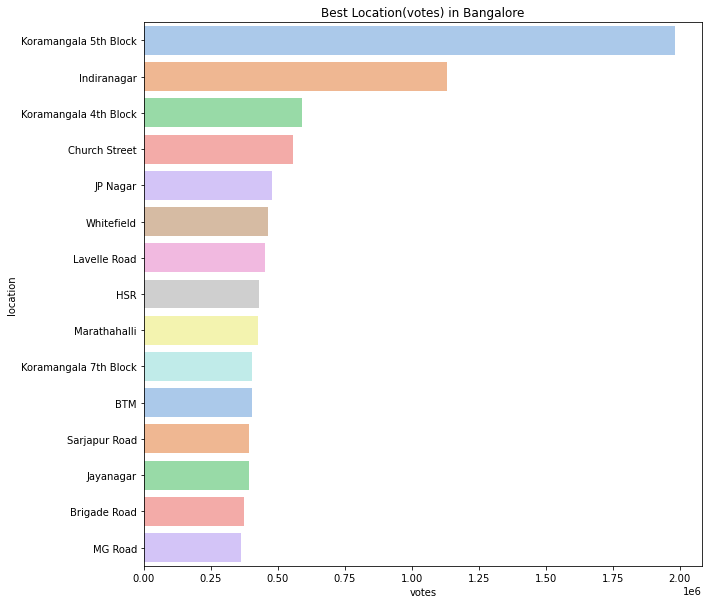

In [82]:
loc_vote=zomato_df.loc[:,['location','votes']]
loc_vote=zomato_df.groupby('location')['votes'].sum()
loc_vote=loc_vote.to_frame()
loc_vote=loc_vote.sort_values("votes",ascending=False)
display(loc_vote.head())
plt.figure(figsize=(10,10))
pt=sns.barplot(y=loc_vote.index[:15],x=loc_vote['votes'][:15],palette='pastel',orient='h')
plt.title('Best Location(votes) in Bangalore')
print(pt)

,rating
location,
BTM,7610.6
Koramangala 5th Block,6364.2
Indiranagar,6110.9
Whitefield,5576.6
HSR,5490.4


AxesSubplot(0.125,0.125;0.775x0.755)


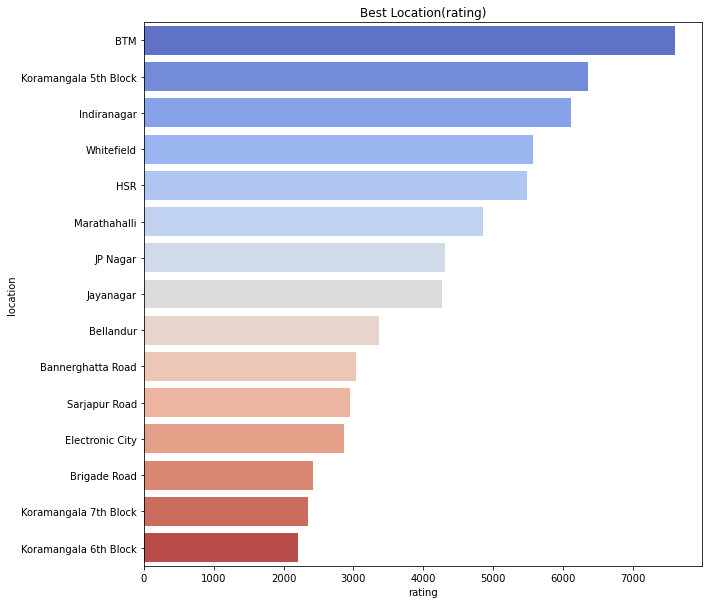

In [86]:
loc_rate=zomato_df.loc[:,['location','rating']]
loc_rate=zomato_df.groupby('location')['rating'].sum()
loc_rate=loc_rate.to_frame()
loc_rate=loc_rate.sort_values("rating",ascending=False)
display(loc_rate.head())
plt.figure(figsize=(10,10))
pt=sns.barplot(y=loc_rate.index[:15],x=loc_rate['rating'][:15],palette='coolwarm',orient='h')
plt.title('Best Location(rating)')
print(pt)

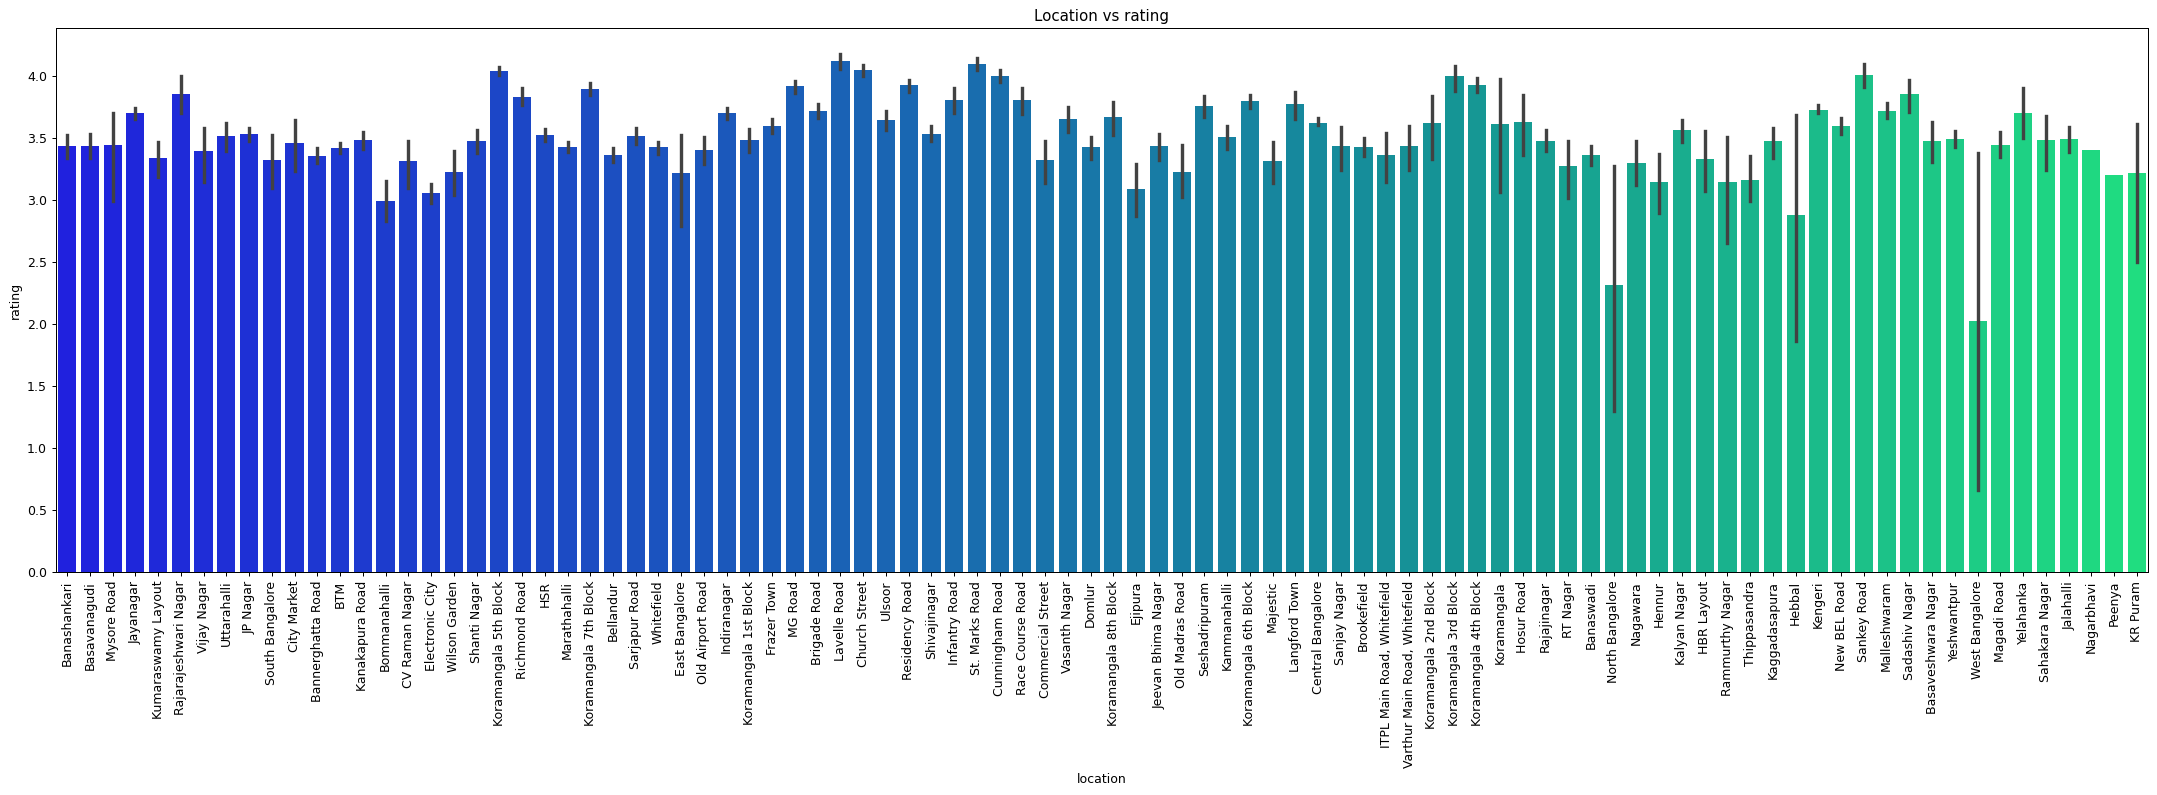

In [90]:
plt.figure(figsize=(30,8),dpi=90)
plt.title('Location vs rating')
sns.barplot(x=zomato_df['location'],y=zomato_df['rating'],data=zomato_df,palette='winter')
plt.xticks(rotation=90)
plt.show()

C:\Users\vhaja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


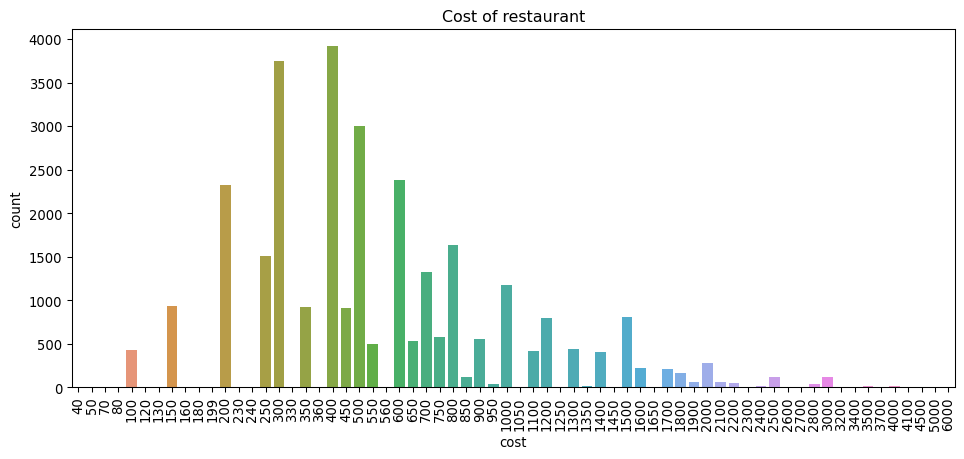

In [108]:
plt.figure(figsize=(12,5),dpi=95)
sns.countplot(zomato_df['cost'])
plt.xticks(rotation=90)
plt.title('Cost of restaurant')
plt.show()

,votes
restaurants,
Byg Brewski Brewing Company,16588.500000
Toit,14956.000000
The Black Pearl,9562.333333
Big Pitcher,9164.500000
Arbor Brewing Company,8396.545455
Prost Brew Pub,7861.666667
Church Street Social,7561.727273
Truffles,7285.292683
Hoot,7257.000000


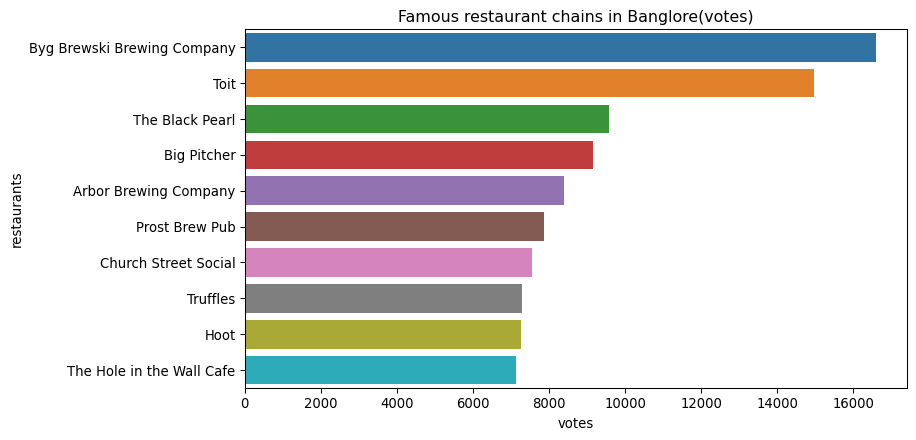

In [109]:
vote=zomato_df.groupby('restaurants')['votes'].agg('mean').sort_values(ascending=False).head(10)
plt.figure(figsize=(9,5),dpi=95)
sns.barplot(y=vote.index,x=vote,orient='h')
plt.title('Famous restaurant chains in Banglore(votes)')
display(vote.to_frame())
plt.show()